# School Shootings in the US

Author: Jackie Huang

#### This project contains the data record of all the school shootings occurred since the Columbine High massacre on April 20, 1999. 

This project is part of the Data Analysis with Python: Zeros to Pandas course - www.zerostopandas.com


The libraries that I used for this project are:

- Jovian
- Pandas
- Numpy
- Matplotlib
- Seaborn
    

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/joebeachcapital/school-shootings' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jhzone88
Your Kaggle Key: ········


100%|██████████| 36.3k/36.3k [00:00<00:00, 161kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './school-shootings'

In [5]:
import os
os.listdir(data_dir)

['school-shootings-data.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "school-shootings-in-us" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jhzone777228812/school-shootings-in-us" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/jhzone777228812/school-shootings-in-us


'https://jovian.com/jhzone777228812/school-shootings-in-us'

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Reading the csv file

In [11]:
school_shootings_df = pd.read_csv('./school-shootings/school-shootings-data.csv')

In [12]:
school_shootings_df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.60,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.00,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.00,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.00,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,386,421899007517,E. Washington Rhodes Elementary School,4218990.0,Philadelphia City Sd,5/8/2023,2022-2023,2023,11:30 AM,Monday,...,40.002800,-75.178100,41.37,KG,8,403,Philadelphia County,42,42101,11.0
383,387,110003000008,Roosevelt High School,1100030.0,District Of Columbia Public Schools,5/17/2023,2022-2023,2023,2:25 PM,Wednesday,...,38.942971,-77.029177,67.90,9,12,392,District Of Columbia,11,11001,11.0
384,390,00600937,St. John's Prep,NaN,NaN,5/22/2023,2022-2023,2023,NaN,Monday,...,42.582682,-70.952603,176.30,6,12,NaN,Essex County,25,25009,21.0
385,389,421917006047,Oliver Citywide Academy,4219170.0,Pittsburgh Sd,5/24/2023,2022-2023,2023,7:30 AM,Wednesday,...,40.464327,-80.024121,22.63,3,12,88,Allegheny County,42,42003,11.0


## Data preparation and cleaning

Let's find out the number of rows and columns from the dataset

In [13]:
school_shootings_df.shape

(387, 50)

Let's view the statistical information for the numerical columns

In [14]:
school_shootings_df.describe()

,uid,nces_district_id,year,killed,injured,casualties,age_shooter1,shooter_deceased1,age_shooter2,shooter_deceased2,...,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing,state_fips,county_fips,ulocale
count,387.000000,3.630000e+02,387.000000,387.000000,387.000000,387.000000,274.000000,262.000000,12.000000,6.000000,...,376.000000,262.000000,262.000000,387.000000,386.000000,386.000000,363.000000,387.000000,387.000000,384.000000
mean,194.542636,2.683346e+06,2014.204134,0.519380,1.108527,1.622739,19.284672,0.152672,16.916667,0.166667,...,8.436170,5.015267,31.683206,0.271318,37.070614,-92.176124,61.546846,26.679587,26776.191214,19.947917
std,112.678322,1.638245e+06,7.452592,2.171772,2.215958,3.847791,9.748823,0.360359,1.505042,0.408248,...,25.989355,23.552659,37.592018,0.445215,5.121773,15.553162,38.739547,16.130641,16166.320448,10.668633
min,1.000000,1.000080e+05,1999.000000,0.000000,0.000000,0.000000,6.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.310400,-157.837200,3.000000,1.000000,1009.000000,11.000000
25%,97.500000,1.200480e+06,2008.000000,0.000000,0.000000,0.000000,15.000000,0.000000,15.750000,0.000000,...,0.000000,0.000000,4.250000,0.000000,33.686293,-97.506534,31.210000,12.000000,12061.000000,11.000000
50%,194.000000,2.614280e+06,2017.000000,0.000000,1.000000,1.000000,16.000000,0.000000,17.000000,0.000000,...,2.000000,1.000000,17.000000,0.000000,37.044535,-87.582092,55.300000,26.000000,26125.000000,13.000000
75%,290.500000,4.155394e+06,2021.000000,0.000000,1.000000,1.000000,19.000000,0.000000,18.000000,0.000000,...,6.000000,2.000000,46.750000,1.000000,40.647249,-80.818711,86.050000,41.000000,41045.000000,22.000000
max,391.000000,5.516470e+06,2023.000000,26.000000,21.000000,34.000000,72.000000,1.000000,20.000000,1.000000,...,331.000000,338.000000,199.000000,1.000000,61.213281,-70.952603,203.320000,55.000000,55139.000000,43.000000


Looking back at the csv file, there are so many columns that are missing at least one value. To verify, we can use `.isna()` method.

In [15]:
# Using .isna method by accessing age_shooter2 column

school_shootings_df.age_shooter2.isna()

0      False
1       True
2       True
3       True
4       True
       ...  
382     True
383     True
384     True
385     True
386     True
Name: age_shooter2, Length: 387, dtype: bool

We can see that only the first row returns the value False while the others returns the value True. This is because many school shooting incidents were carried out by a sole shooter. The first row is the data from the Columbine high school massacre that were carried out by two shooters.  

### Number of male and female shooters 

In [16]:
school_shootings_df.gender_shooter1.value_counts()

m    294
f     14
h      1
Name: gender_shooter1, dtype: int64

There were 294 male shooters and 14 female shooters. However, we do not know what 'h' stands for. The school name associated with the 'h' value turns out to be John Muir Elementary School. According to the news, the person who shot up the school was identified as a man. In order to change the value from 'h' to 'm', we use the `loc()` method. 

In [17]:
school_shootings_df.loc[106, 'gender_shooter1'] = 'm'

Now we have a total of 295 male shooters. 

In [18]:
gender_counts = school_shootings_df.gender_shooter1.value_counts()
gender_counts

m    295
f     14
Name: gender_shooter1, dtype: int64

### Number of deaths 

In [19]:
school_shootings_df.killed.sum()

201

### Number of injuries 

In [20]:
school_shootings_df.injured.sum()

429

### Number of casualties

In [21]:
school_shootings_df.casualties.sum()

628

We see that the number of deaths and the number of injuries do not add up to the number of casualties. We need to change that by determining how many rows have a discrepancy between the number of deaths, the number of injuries, and the number of casualties.  

In [22]:
discrepancy_df = school_shootings_df[(school_shootings_df['killed'] + school_shootings_df['injured']) != school_shootings_df['casualties']]
discrepancy_df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
328,337,320006000114,Western High School,3200060.0,Clark County School District,3/29/2022,2021-2022,2022,2:15 PM,Tuesday,...,36.176163,-115.202879,103.00,9,12,2732,Clark County,32,32003,11.0
337,343,120150002783,Alexander W. Dreyfoos School of Arts,1201500.0,Palm Beach County,5/13/2022,2021-2022,2022,11:58 AM,Friday,...,26.709238,-80.059481,65.00,9,12,327,Palm Beach County,12,12099,12.0
341,348,062271003052,Ulysses S. Grant High School,622710.0,Los Angeles Unified School District,6/1/2022,2021-2022,2022,3:25 PM,Wednesday,...,34.177798,-118.415327,94.35,9,12,2609,Los Angeles County,6,6037,11.0


There are 3 rows that have a discrepancy. Let's narrow down to those 3 columns so we can see better. 

In [23]:
discrepancy_df[['killed', 'injured', 'casualties']]

,killed,injured,casualties
328,0,2,0
337,1,0,0
341,0,1,2


We need to change the value of casualties for each row.

In [24]:
school_shootings_df.loc[328, 'casualties'] = 2

In [25]:
school_shootings_df.loc[337, 'casualties'] = 1

In [26]:
school_shootings_df.loc[341, 'casualties'] = 1

Now run the sum of each column again 

In [27]:
school_shootings_df.killed.sum()

201

In [28]:
school_shootings_df.injured.sum()

429

In [29]:
school_shootings_df.casualties.sum()

630

###  Number of school shooters by race

In [30]:
school_shootings_df.race_ethnicity_shooter1.value_counts()

w           72
b           60
h            9
ai           2
m            2
a            1
n            1
Hispanic     1
Name: race_ethnicity_shooter1, dtype: int64

In [31]:
school_shootings_df.loc[343, 'race_ethnicity_shooter1'] = 'h'

Change the value 'Hispanic' to 'h'

In [32]:
school_shootings_df.race_ethnicity_shooter1.value_counts()

w     72
b     60
h     10
ai     2
m      2
a      1
n      1
Name: race_ethnicity_shooter1, dtype: int64

In [33]:
school_shootings_df.race_ethnicity_shooter2.value_counts()

w    3
b    3
h    1
Name: race_ethnicity_shooter2, dtype: int64

As we can see, most of the school shooters were reportedly identified as White and Black

In [34]:
# Changing the value from string to integer

school_shootings_df.loc[373, 'hispanic'] = 1107

In [35]:
school_shootings_df.loc[373, 'enrollment'] = 2541

In [36]:
school_shootings_df.loc[381, 'enrollment'] = 1051

### Number of schools by type

In [37]:
schools_type_counts = school_shootings_df.school_type.value_counts()
schools_type_counts

public     363
private     24
Name: school_type, dtype: int64

### The average age of a school shooter

In [38]:
average_age = school_shootings_df.age_shooter1.mean()

In [39]:
print('The average age of a school shooter is {:.2f}'.format(average_age))

The average age of a school shooter is 19.28


### Number of each shooting type (indiscriminate, targeted, accidental, unclear, etc...)

In [40]:
school_shootings_df.shooting_type.value_counts()

targeted                       223
indiscriminate                  63
accidental                      51
unclear                         30
public suicide                   8
targeted and indiscriminate      6
accidental or targeted           2
hostage suicide                  2
public suicide (attempted)       1
suicide                          1
Name: shooting_type, dtype: int64

### Number of school shooting incidents by year

In [41]:
school_shootings_df['year'].value_counts()

2022    46
2021    42
2018    30
2023    28
2019    27
2014    16
2006    15
2017    15
2005    13
2013    13
2016    13
2001    13
2000    12
2003    12
2012    11
2007    10
2004     9
2008     9
2020     9
2010     9
2009     9
1999     7
2015     7
2011     7
2002     5
Name: year, dtype: int64

### Number of school shooting incidents by school year

In [42]:
school_shootings_df['school_year'].value_counts()

2021-2022    57
2022-2023    45
2017-2018    29
2018-2019    23
2013-2014    20
2019-2020    19
2020-2021    17
2005-2006    16
2016-2017    15
1999-2000    14
2006-2007    14
2000-2001    12
2010-2011    11
2004-2005    11
2015-2016    10
2003-2004    10
2011-2012     9
2009-2010     9
2007-2008     9
2002-2003     9
2012-2013     8
2014-2015     6
2008-2009     6
2001-2002     5
1998-1999     3
Name: school_year, dtype: int64

### Using the drop method

We also notice some of the columns are insignificant or unnecessary to this project. For the sake of clarity and simplicity, it is better to remove them. 

In [43]:
school_shootings_df.drop(columns=['two_or_more','lunch','state_fips','county_fips','ulocale'], inplace=True)

In [44]:
school_shootings_df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,hawaiian_native_pacific_islander,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,county
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.60,9,12,Jefferson County
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.00,6,8,East Baton Rouge Parish
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.00,9,12,Rockdale County
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.00,9,12,Philadelphia County
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,Suffolk County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,386,421899007517,E. Washington Rhodes Elementary School,4218990.0,Philadelphia City Sd,5/8/2023,2022-2023,2023,11:30 AM,Monday,...,0.0,0,NaN,NaN,40.002800,-75.178100,41.37,KG,8,Philadelphia County
383,387,110003000008,Roosevelt High School,1100030.0,District Of Columbia Public Schools,5/17/2023,2022-2023,2023,2:25 PM,Wednesday,...,0.0,0,NaN,NaN,38.942971,-77.029177,67.90,9,12,District Of Columbia
384,390,00600937,St. John's Prep,NaN,NaN,5/22/2023,2022-2023,2023,NaN,Monday,...,10.0,0,NaN,NaN,42.582682,-70.952603,176.30,6,12,Essex County
385,389,421917006047,Oliver Citywide Academy,4219170.0,Pittsburgh Sd,5/24/2023,2022-2023,2023,7:30 AM,Wednesday,...,0.0,0,NaN,NaN,40.464327,-80.024121,22.63,3,12,Allegheny County


## Exploratory Analysis and Visualization

Here we will be using `matplotlib.pyplot` and `seaborn`.

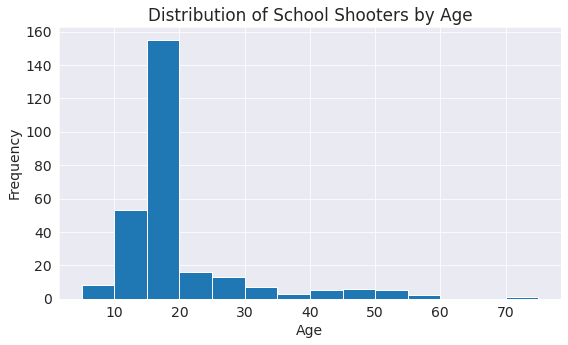

In [45]:
plt.title('Distribution of School Shooters by Age')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.hist(school_shootings_df.age_shooter1, bins=np.arange(5,80,5));


We can see that the age of school shooters lie in the range 5-75 and the majority of them are in the range 15-20. 

### Gender Distribution

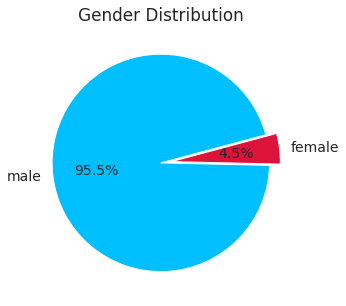

In [46]:
gender = ['male', 'female']
colors = ['DeepSkyBlue', 'Crimson']

plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender, autopct='%.1f%%', startangle=15, explode = (0, 0.1), colors = colors);

Over 95% of the shooters were male. 

### School type distribution

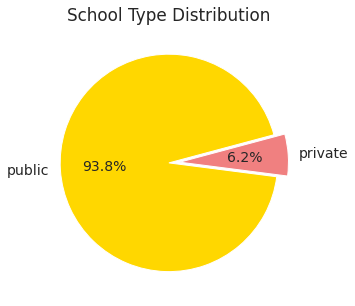

In [47]:
school_type = ['public', 'private']
colors = ['Gold', 'LightCoral']

plt.title('School Type Distribution')
plt.pie(schools_type_counts, labels = school_type, autopct='%.1f%%', startangle=15, explode = (0, 0.1), colors = colors);

Over 93% of the targeted schools were public. 

### Student Enrollment Distribution

In [48]:
white_df = school_shootings_df['white'].sum()
white_df

141448.0

In [49]:
black_df = school_shootings_df['black'].sum()
black_df

133610.0

In [50]:
hispanic_df = school_shootings_df['hispanic']
hispanic_df

0      112
1        0
2       28
3       27
4      287
      ... 
382     20
383    354
384    140
385      2
386      2
Name: hispanic, Length: 387, dtype: object

Notice that the data type for this column is object. We need to change the data type to float in order to use the `sum` method. 

In [51]:
hispanic_df_float = hispanic_df.astype(float) 
hispanic_df_float

0      112.0
1        0.0
2       28.0
3       27.0
4      287.0
       ...  
382     20.0
383    354.0
384    140.0
385      2.0
386      2.0
Name: hispanic, Length: 387, dtype: float64

In [52]:
hispanic_df_sum = hispanic_df_float.sum()
hispanic_df_sum

107939.0

In [53]:
asian_df = school_shootings_df['asian'].sum()
asian_df

14571.0

In [54]:
ai_df = school_shootings_df['american_indian_alaska_native'].sum()
ai_df

3172.0

In [55]:
hn_df = school_shootings_df['hawaiian_native_pacific_islander'].sum()
hn_df

1314.0

In [56]:
# Total student enrollment population where the shootings took place from 1999-2023

white_df + black_df + hispanic_df_sum + asian_df + ai_df + hn_df

402054.0

In [57]:
# Define a list for each total enrollment by race

sum_race = [white_df, black_df, hispanic_df_sum, asian_df, ai_df, hn_df]
sum_race

[141448.0, 133610.0, 107939.0, 14571.0, 3172.0, 1314.0]

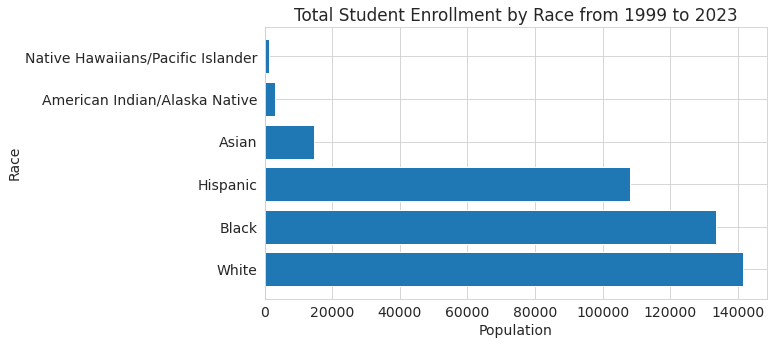

In [58]:
race = ['White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native', 'Native Hawaiians/Pacific Islander']
sns.set_style('whitegrid')

plt.title('Total Student Enrollment by Race from 1999 to 2023')
plt.xlabel('Population')
plt.ylabel('Race')
plt.barh(race, sum_race);

The horizontal bar graph shows the total population by race for every targeted school from 1999 to 2023.

### School Type Distribution

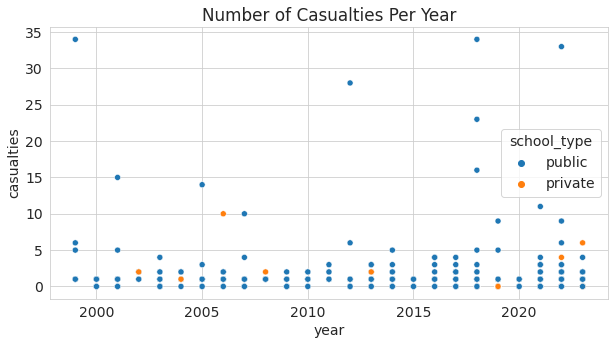

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Number of Casualties Per Year')

sns.scatterplot(x=school_shootings_df.year, y=school_shootings_df.casualties, hue=school_shootings_df.school_type);

Here we can see that the majority of the school shooting incidents involved having 0-5 people killed or injured, and many of the targeted schools were public. 

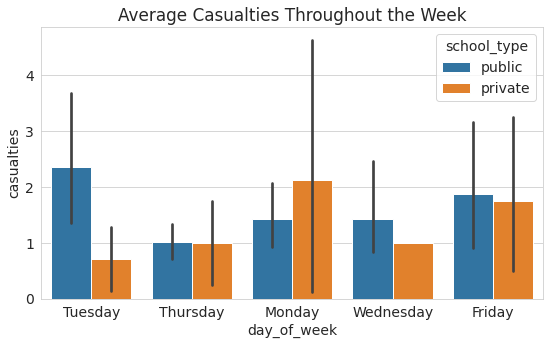

In [60]:
plt.title('Average Casualties Throughout the Week')
sns.barplot(x=school_shootings_df.day_of_week, y=school_shootings_df.casualties, hue=school_shootings_df.school_type);

This bar chart visualizes the average casualties for every day of the week the attack occurred. The lines cutting each bar represent the amount of variation in the values. It seems like the variation for the total number of casualties is relatively high on Monday for private schools. There is no variation on Wednesday for private schools. 

### Distribution of Deaths by Shooting Type

In [61]:
indiscriminate_df = school_shootings_df[school_shootings_df.shooting_type == 'indiscriminate']
targeted_df = school_shootings_df[school_shootings_df.shooting_type == 'targeted']
accidental_df = school_shootings_df[school_shootings_df.shooting_type == 'accidental']
uncleared_df = school_shootings_df[school_shootings_df.shooting_type == 'unclear']

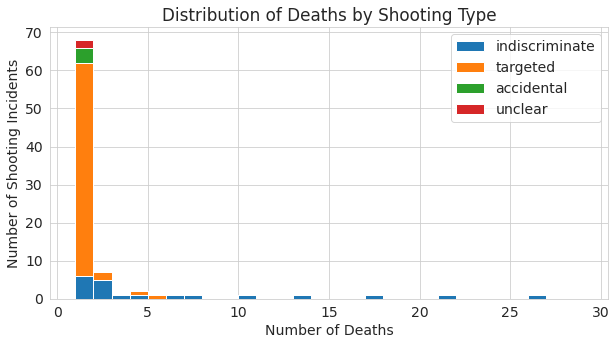

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Deaths by Shooting Type')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Shooting Incidents')

plt.hist([indiscriminate_df.killed, targeted_df.killed, accidental_df.killed, uncleared_df.killed], bins=np.arange(1,30,1), stacked=True);

plt.legend(['indiscriminate', 'targeted', 'accidental', 'unclear']);

In this histogram, we can see that many school shooting incidents have zero deaths. Many of these school shooting incidents were targeted. The highest number of deaths in a single shooting incident so far is over 25, and that came from Sandy Hook Elementary School shooting. 

### Plotting multiple charts in a grid 

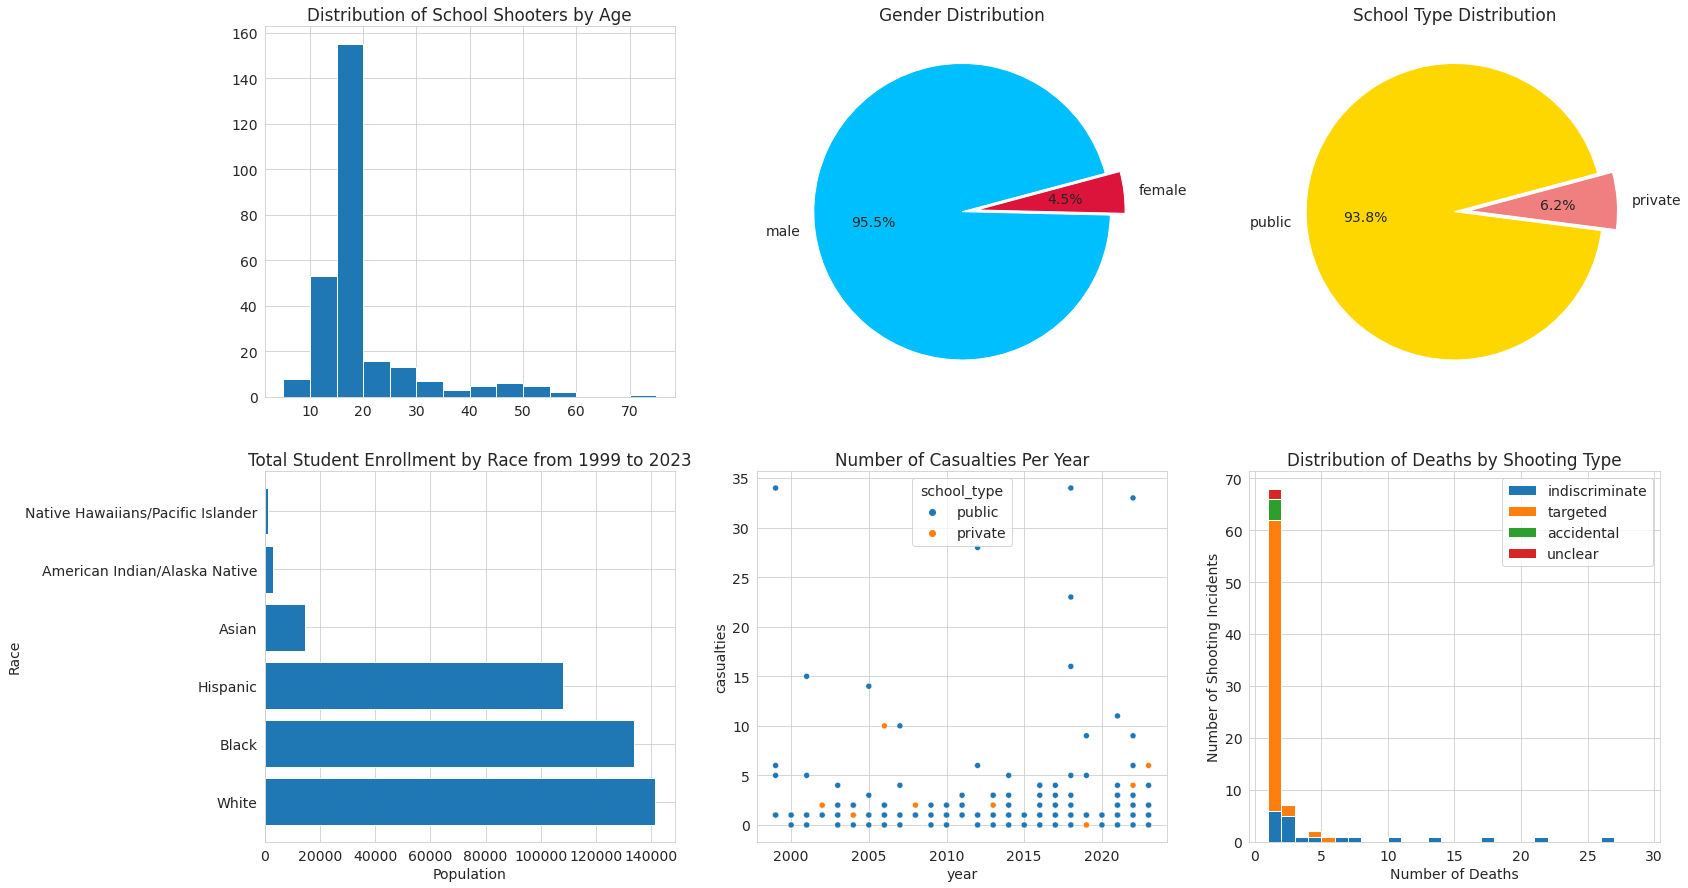

In [63]:
fig, axes = plt.subplots(2,3, figsize=(25, 15))

# Use the axes for plotting

axes[0,0].set_title('Distribution of School Shooters by Age')
axes[0,0].hist(school_shootings_df.age_shooter1, bins=np.arange(5,80,5))


gender = ['male', 'female']
colors = ['DeepSkyBlue', 'Crimson']
axes[0,1].set_title('Gender Distribution')
axes[0,1].pie(gender_counts, labels = gender, autopct='%.1f%%', startangle=15, explode = (0, 0.1), colors = colors)


school_type = ['public', 'private']
colors = ['Gold', 'LightCoral']
axes[0,2].set_title('School Type Distribution')
axes[0,2].pie(schools_type_counts, labels = school_type, autopct='%.1f%%', startangle=15, explode = (0, 0.1), colors = colors)


race = ['White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native', 'Native Hawaiians/Pacific Islander']
sns.set_style('whitegrid')
axes[1,0].set_title('Total Student Enrollment by Race from 1999 to 2023')
axes[1,0].set(xlabel='Population', ylabel='Race')
axes[1,0].barh(race, sum_race)


axes[1,1].set_title('Number of Casualties Per Year')
sns.scatterplot(x=school_shootings_df.year, y=school_shootings_df.casualties, hue=school_shootings_df.school_type, ax=axes[1,1])


axes[1,2].set_title('Distribution of Deaths by Shooting Type')
axes[1,2].hist([indiscriminate_df.killed, targeted_df.killed, accidental_df.killed, uncleared_df.killed], bins=np.arange(1,30,1), stacked=True);
axes[1,2].set(xlabel='Number of Deaths',ylabel= 'Number of Shooting Incidents')
axes[1,2].legend(['indiscriminate', 'targeted', 'accidental', 'unclear']);

## Asking and Answering Questions

### Q1: What are the top 5 states that have the most shooting incidents?

In [64]:
top_five = school_shootings_df.state.value_counts().head(5)
df = pd.DataFrame(top_five)
df

,state
California,40
Texas,25
Florida,24
North Carolina,21
Pennsylvania,17


### Q2: How many school districts have more than one shooting incident?

In [65]:
at_least_two = school_shootings_df['district_name'].value_counts() >= 2
df = pd.DataFrame(at_least_two)
df

,district_name
Los Angeles Unified,True
City Of Chicago Sd 299,True
Philadelphia City SD,True
Charlotte-Mecklenburg Schools,True
Mobile County,True
...,...
Newtown School District,False
Taft Union High,False
Winston Salem/Forsyth County Schools,False
Austin ISD,False


In [66]:
df.loc[df['district_name'] == True]

,district_name
Los Angeles Unified,True
City Of Chicago Sd 299,True
Philadelphia City SD,True
Charlotte-Mecklenburg Schools,True
Mobile County,True
Baltimore City Public Schools,True
Clark County School District,True
Portsmouth City Pblc Schs,True
Pittsburgh Sd,True
Columbus City School District,True


In [67]:
df.loc[df['district_name'] == True].count()

district_name    33
dtype: int64

### Q3: Which year has the most deaths, injuries, and casualties? 

In [68]:
kic = school_shootings_df.groupby('year')[['killed','injured','casualties']].sum()
kic

,killed,injured,casualties
year,,,
1999,14,35,49
2000,4,3,7
2001,5,22,27
2002,1,7,8
2003,5,8,13
2004,3,9,12
2005,9,17,26
2006,9,16,25
2007,1,17,18


In [69]:
kic[kic.killed == kic.killed.max()]

,killed,injured,casualties
year,,,
2022,34,58,92


In [70]:
kic[kic.injured == kic.injured.max()]

,killed,injured,casualties
year,,,
2018,33,62,95


In [71]:
kic[kic.casualties == kic.casualties.max()]

,killed,injured,casualties
year,,,
2018,33,62,95


### Q4a: Out of all school shooters who died, how many of them reportedly died by suicide?

In [72]:
deceased_df = school_shootings_df[school_shootings_df['shooter_deceased1'] == 1]
total_deceased = deceased_df['shooter_deceased1'].count()
total_deceased

40

In [73]:
suicide_df = deceased_df[deceased_df['deceased_notes1'] == 'suicide']
total_suicide = suicide_df['deceased_notes1'].count()
total_suicide

35

### Q4b: what is the percentage of the school shooters who committed suicide?

In [74]:
percentage = (total_suicide / total_deceased)*100

In [75]:
print('{}% of the school shooters\' deaths were by suicide'.format(percentage))

87.5% of the school shooters' deaths were by suicide


### Q5: Graph the total number of deaths, injuries, and casualties across the years

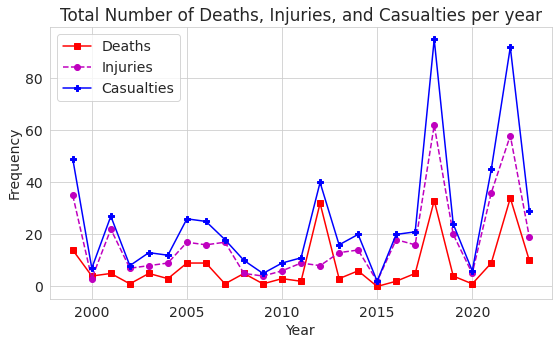

In [76]:
plt.title('Total Number of Deaths, Injuries, and Casualties per year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.plot(kic.killed, 's-r')
plt.plot(kic.injured, 'o--m')
plt.plot(kic.casualties, 'P-b')

plt.legend(['Deaths', 'Injuries', 'Casualties']);

Based on the graph, it looks like there are many more total deaths, injuries, and casualties in the recent decade. Let's answer a couple of questions to confirm my hypothesis. 

#### How many total number of deaths, injuries, and casualties are there between 1999-2011?

In [77]:
year_count = [i for i in range(1999, 2012)]
count_in_range = school_shootings_df.loc[school_shootings_df['year'].isin(year_count)]

deaths = sum(count_in_range.killed)
injuries = sum(count_in_range.injured)
casualties = sum(count_in_range.casualties)

print('The total number of deaths from 1999 to 2011 is', deaths)
print('The total number of injuries from 1999 to 2011 is', injuries)
print('The total number of casualties from 1999 to 2011 is', casualties)

The total number of deaths from 1999 to 2011 is 62
The total number of injuries from 1999 to 2011 is 158
The total number of casualties from 1999 to 2011 is 220


#### How many total number of deaths, injuries, and casualties are there between 2012-2023?

In [78]:
year_count = [i for i in range(2012, 2024)]
count_in_range = school_shootings_df.loc[school_shootings_df['year'].isin(year_count)]

deaths = sum(count_in_range.killed)
injuries = sum(count_in_range.injured)
casualties = sum(count_in_range.casualties)

print('The total number of deaths from 2012 to 2023 is', deaths)
print('The total number of injuries from 2012 to 2023 is', injuries)
print('The total number of casualties from 2012 to 2023 is', casualties)

The total number of deaths from 2012 to 2023 is 139
The total number of injuries from 2012 to 2023 is 271
The total number of casualties from 2012 to 2023 is 410


## Inferences and Conclusion

Based on the above analysis from the dataset, we can infer that

- There are an overwhelming number of shooting incidents committed by the age range between 15 and 20. Most of them were students at the targeted school.    

- The majority of the shooters were male; 95.5% of shooters were male and 4.5% were female. 

- The majority of the targeted schools were public; 93.8% of schools were public and 6.2% were private. 

- California has the most school shooting incidents with a total number of 40. 

- There are 33 school districts that have at least 2 school shooting incidents. 

- The distribution of the line graph for the total number of deaths, injuries, and casualties is mostly left skewed. Meaning that there have been more victims of school shootings in the recent decade than in the first decade since the Columbine High School massacre. There are more than twice the number of deaths between 2012 and 2023 than the number of deaths between 1999 and 2011. So far, 2018 is the deadliest year for school shootings as it has the highest number of injuries and casualties. School shootings are very likely to get even more dangerous from this point forward as the number of victims increases.   


## References and Future Work

Reference:

- For using Pandas: https://pandas.pydata.org/
- For creating bars - specifically horizonatal bars: https://www.w3schools.com/python/matplotlib_bars.asp 
- For creating grouped barplots with seaborn: https://seaborn.pydata.org/examples/grouped_barplot.html
- For creating pie charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp
- For creating scatter plots with seaborn: https://seaborn.pydata.org/examples/scatter_bubbles.html

Future Work:

There are many improvements we can make to this project with the help of additional tools and datasets. Here are some of the things we can do to enhance this project even better:

- Use an additional dataset for shooting incidents at universities. Analyze and compare it with this dataset.
- Find out which month is the most active for school shootings. 
- Analyze if there is a correlation between mental illness and school shootings by using data gathered from perpetrators who survived the shootings.  
- Predict the number of school shootings in the next few years with machine learning models. 

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jhzone777228812/school-shootings-in-us" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/jhzone777228812/school-shootings-in-us


'https://jovian.com/jhzone777228812/school-shootings-in-us'

Here is the link to the dataset: https://www.kaggle.com/datasets/joebeachcapital/school-shootings